In [1]:
from display_images import display_2_imgs, display_3_imgs, display_4_imgs, show_prediction
import os
os.chdir("../../")

Using TensorFlow backend.


# *tabOCR* project

## Temat:
### Rozpoznawanie oraz ekstrakcja struktury danych tabelarycznych ze zdjęć.

### Skład:
- Dominik Falkiewicz
- Dominik Horwat

## Cel:
Automatyczne odtworzenie struktury tabelki na podstawie zdjęcia tabelki. Wynikiem jest plik `.csv/.xlsx`. Zadanie podzielone jest na 3 etapy. Etap 1 i etap 2 realizują różne zadania i wymagają uzycia 2 różnych modeli.

- etap 1: <span style="color:green">rozpoznanie struktury tabelki - podział na kolumny/wiersze/komórki (ANN)</span>, 

- etap 2: <span style="color:red">ekstrakcja danych tekstowych (ANN)</span>,

- etap 3: <span style="color:red">odtworzenie struktury tabelki - plik `.csv/.xlsx`</span>.

## Dane

Dane zostały sztucznie wygenerowane wykorszystując Python'a (biblioteka `excel2img`) oraz Excel'a (wykorzystywany pośrednio, przez bibliotekę `excel2img`). Dzięki temu ilość wygenerowanych danych może być dowolna. Generator zapewnia tworzenie różnorodnych zestawów danych - każdy z parametrów określających dana tabelę jest wybierany losowo. Poniżej wymienona jest większość parametrów definiujących tabelę:

- liczba kolumn,
- liczba wierszy,
- szerokość kolumn,
- wysokośc wierszy,
- rozmiar i rodzaj czcionki,
- rodzaj, rozmiar, czy istnieje (jest lub nie) obramowania,
- zawartość (tekst, liczby, tekst/liczby),
- długość wyrazów, liczby całkowite/rzeczywiste,
- itp.

Generator (ze względu na złożoność zagadnienia) tworzy następujące elementy pojedynczego zestawu danych:
- tabela - obraz (xlsx/csv),
- tabela - obraz (png),
- maska binarna - obraz; pozycje tekstu w ramach komórek (png),
- maska binarna - obraz; pozycje tekstu w ramach kolumn (png),
- maska - obraz; pozycje kolumn (png),
- maska - obraz; pozycje komórek (png),
- w ramach danej tabeli:
    - kolumny - obraz każdej z kolumn (png),
    - kolumny - tekst każdej z kolumn (json)
    - komórki - obraz każdej z komórek (png),
    - komórki - tkest każdej z komórek (json).
    
Przykładowy zestaw danych:

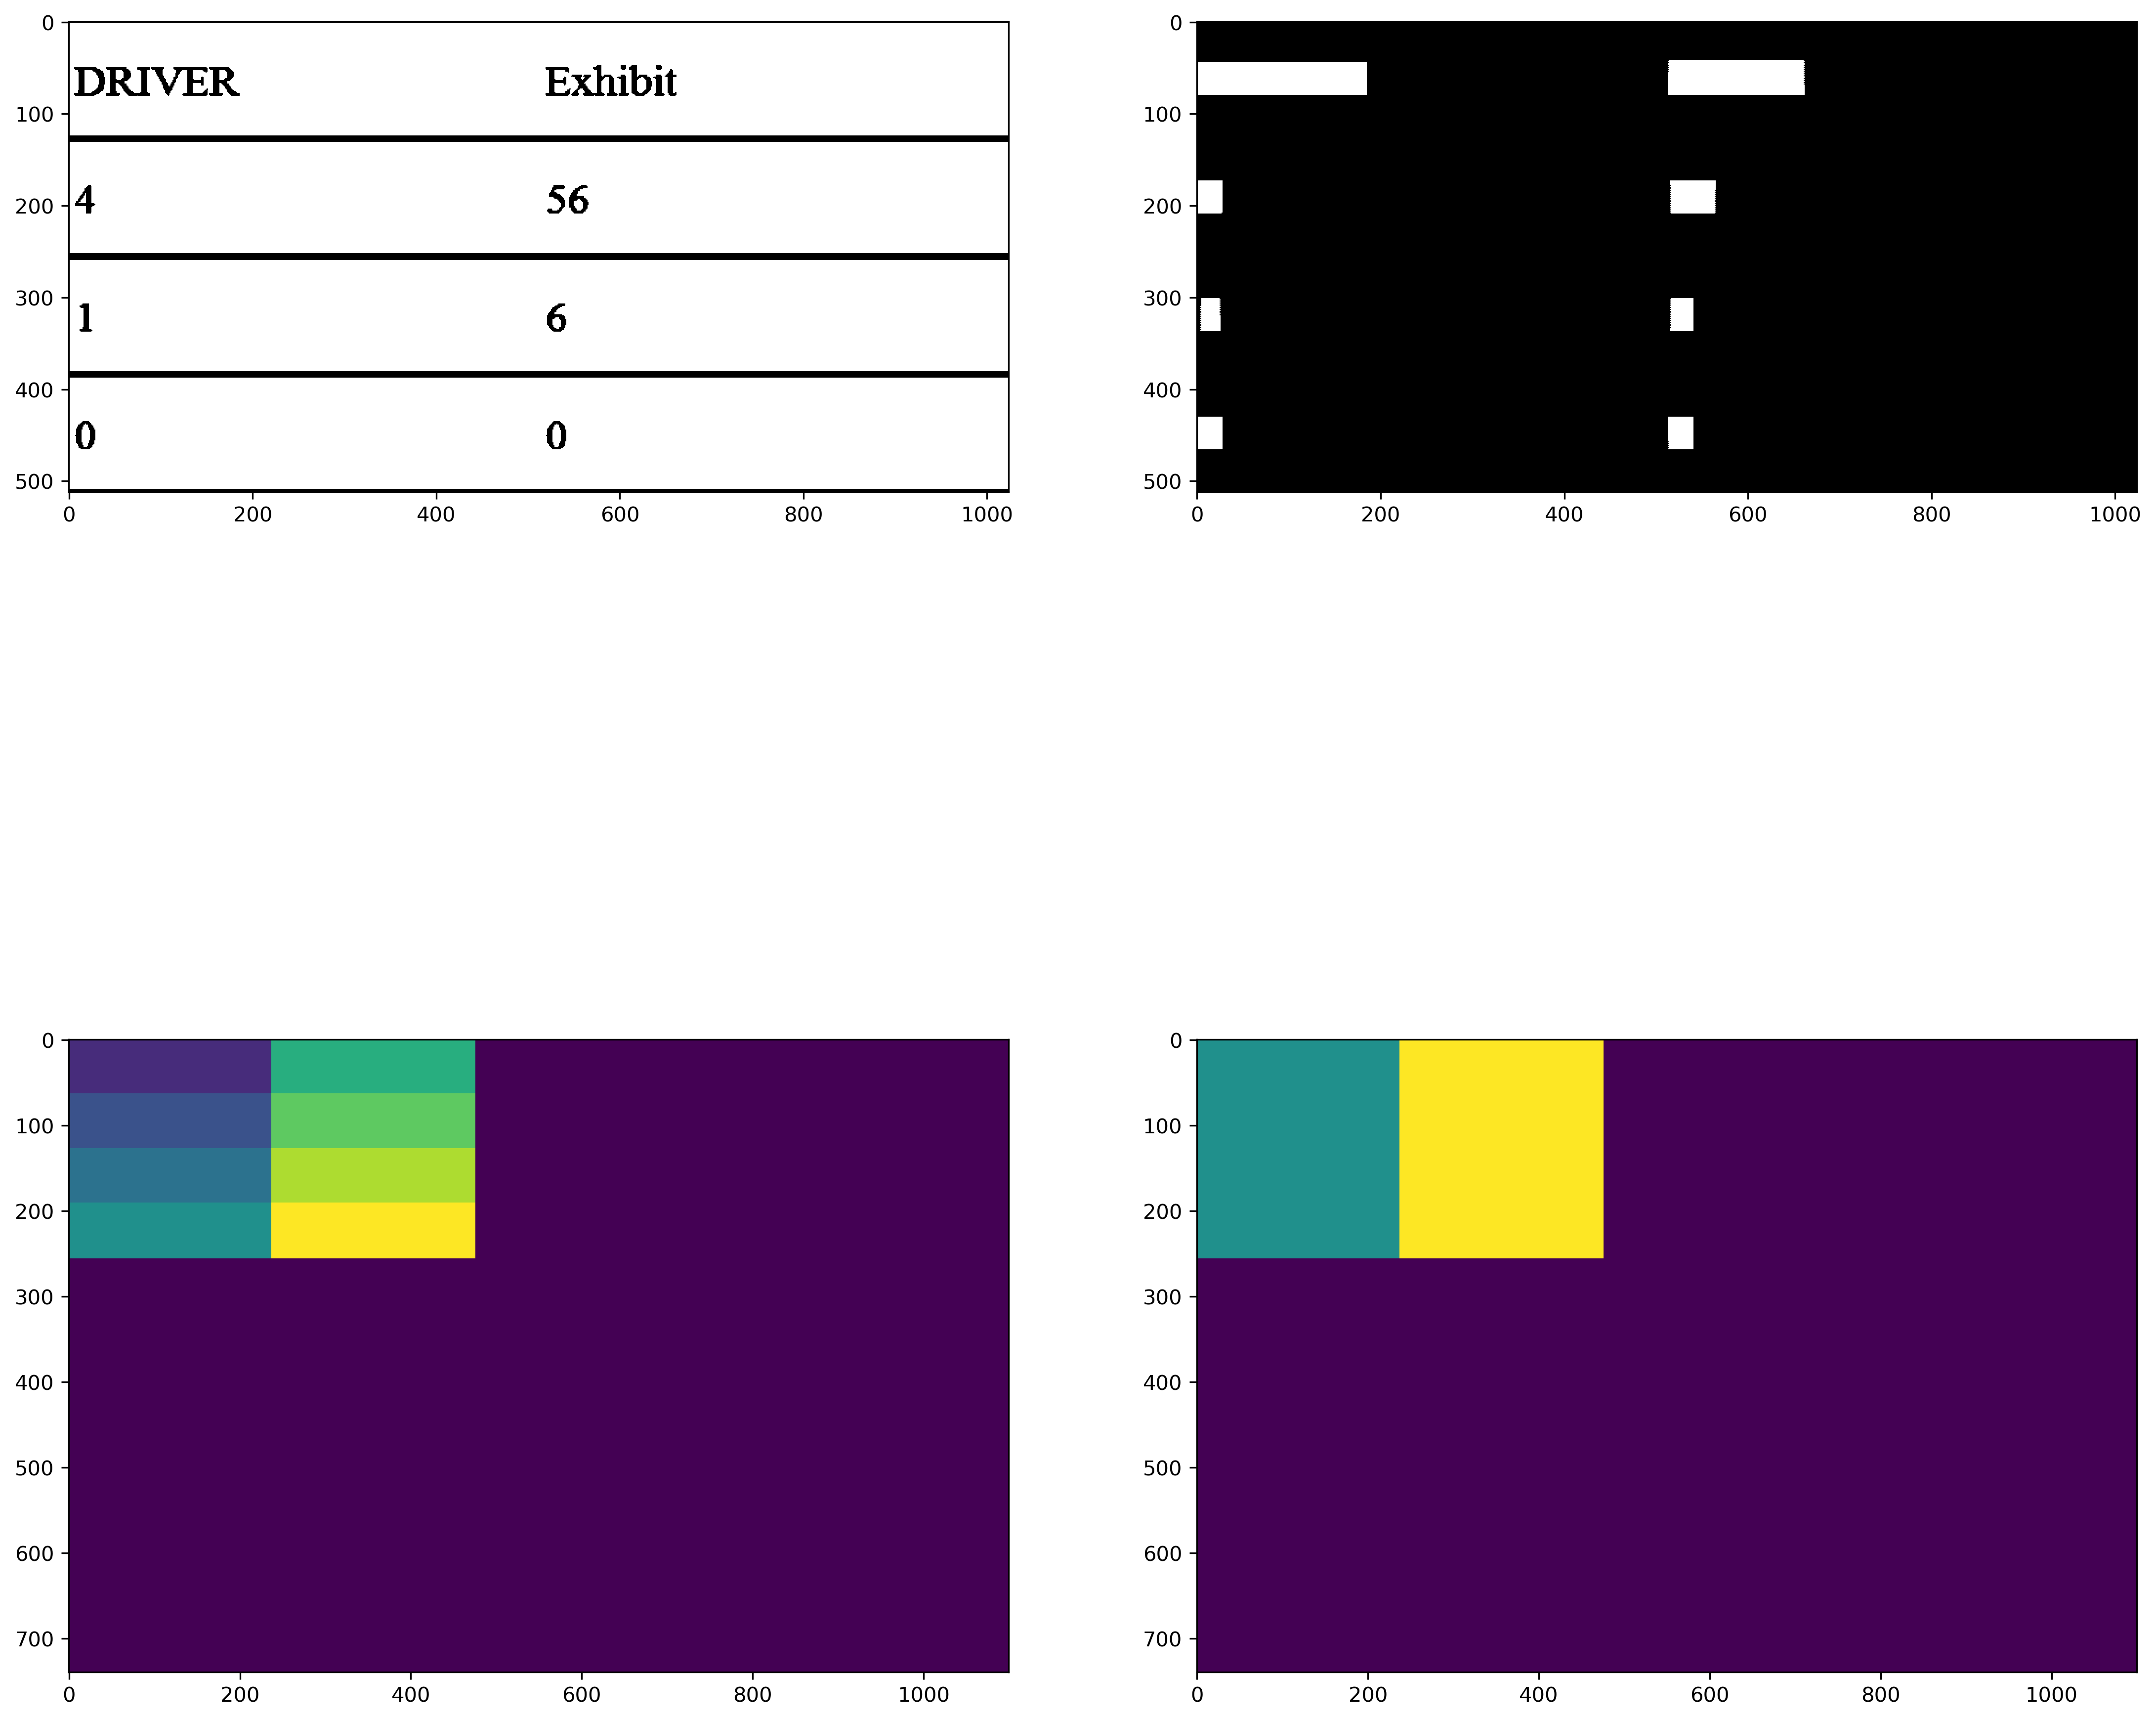

In [2]:
display_4_imgs("notebooks/summary/images/0_table_img.png", "notebooks/summary/images/0_table_mask.png",
               "notebooks/summary/images/mask_cell.png", "notebooks/summary/images/mask_column.png")

## Model

### Etap 1:

#### Definicja problemu:

Celem etapu pierwszego jest rozpoznanie struktury tabelki na podstawie jej zdjęcia. W rzeczywistości problem sporwadza sie do odpowiedniego podziału tabelki na kolumny oraz komórki. Innymi słowy, celem jest znalezienie na obrazie podobszarów, w którch znajduję się tekst oraz obszarów, w których zawiera się każda z kolumn. Taki podział pozwoli jednoznacznie zdefiniować przynależność danej komórki do danej kolumny. Zadanie określa się mianem segmentacji semantycznej, która polega na klasyfikowaniu każdego piksela na obrazie do wstępnie zdefiniowanej ilości klas (2 w przypadku klasyfikacji binarnej).


**a) Pozycje tekstu w tabelce**

#### Rozwiązanie/implementacja

- zadanie: datekcja miejsc występowania tekstu (binarna),
- rodzaj sieci: sieć konwolucyjna o strukturze autoenkodera z skip-connections,
- input: obraz tabelki (`.png`/`np.array`),
- output: maska binarna (`np.array`) określająca pozycję każdej komórki (tj. tekstu) w tabeli,
- funkcja kosztu: `binary crossentropy`

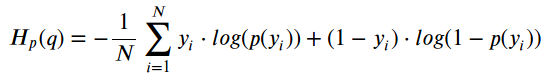

    gdzie: 
    - y - etykieta/label (1 dla pikseli zawierających tekst i 0 dla pozostałych),
    - p(y) - przewidywane prawdopodobieństwo znalenzienia piksela zawierającego tekst dla wszystkich N punktów

- hiperparametry (i inne):
    - learning rate: **0.001**,
    - liczba klas: **2**,
    - ilość epok: **15**,
    - rozmiar obrazów: $512\times1024$,
    - rozmiar batch'a: **4**,
    - ilośc kroków w epoce: **1000**,
    - rozmiar danych:
        - zbiór treningowy: **4000**,
        - zbiór walidacyjny: **1000**,
- miara dokładności: Intersection-Over-Union (Jaccard Index); IoU to stosunek części wspólnej obrazu będącego output'em sieci a tzw. 'ground truth' podzielony przez sumę tych obszarów. Zakres $IoU$ wynosi 0–1 (0–100%).

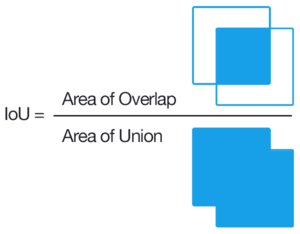
source: wikipedia.com

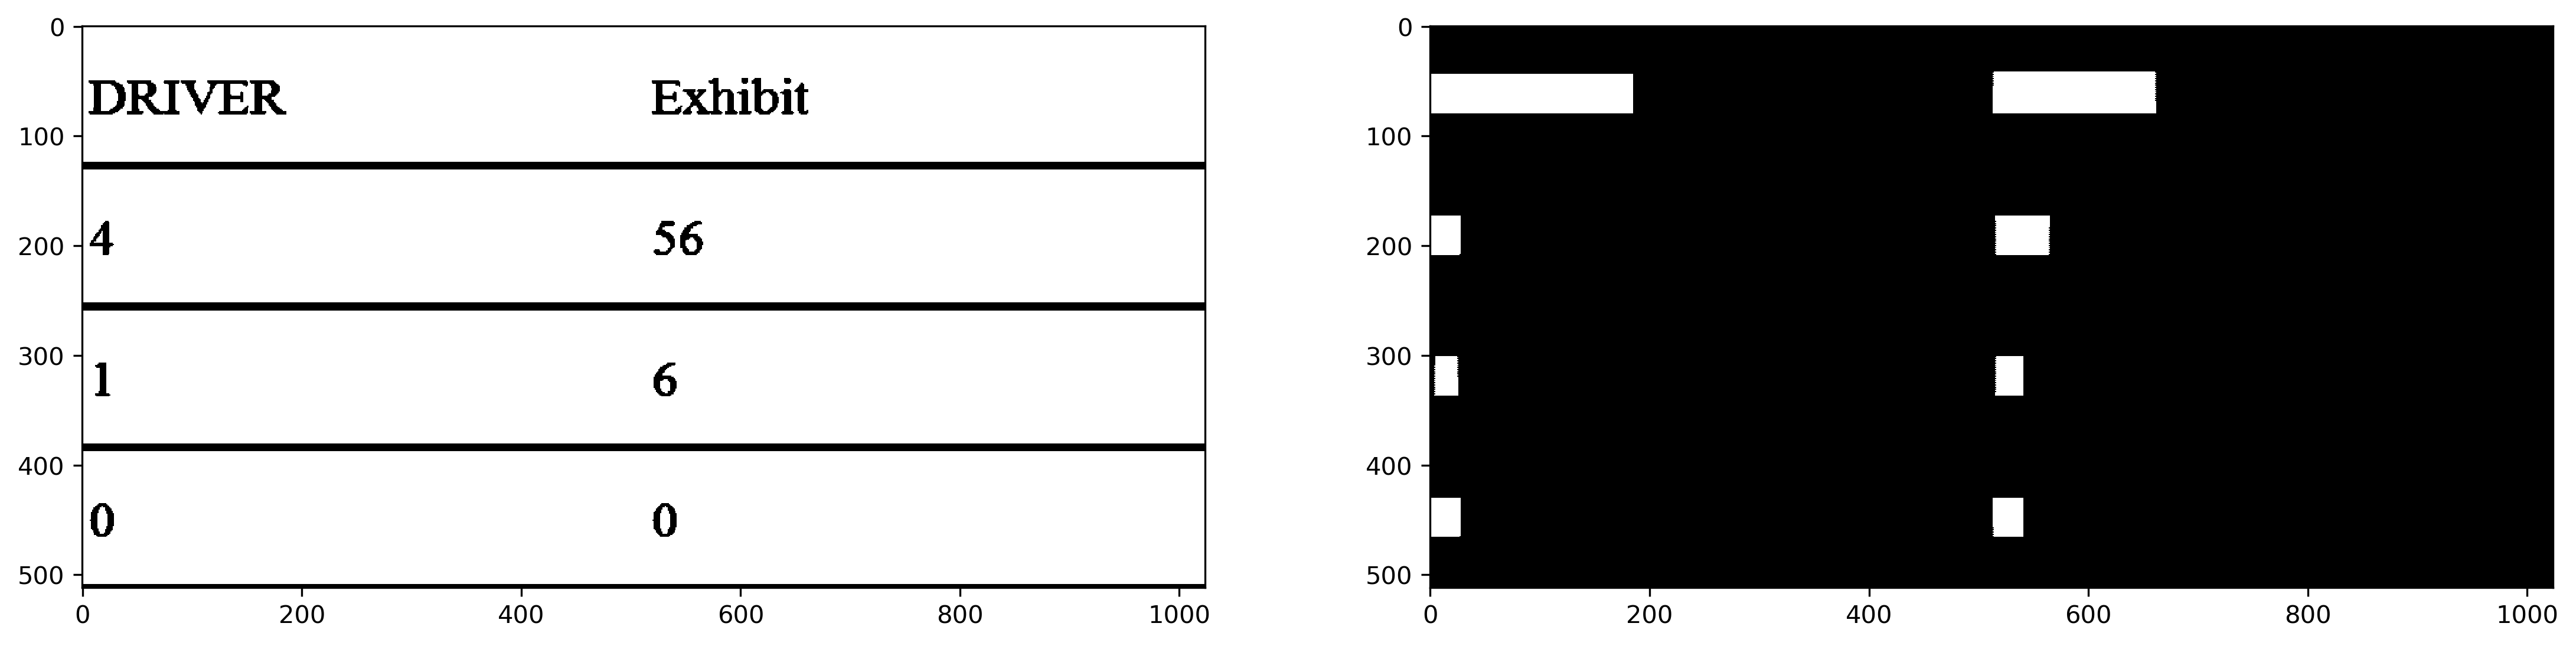

In [3]:
display_2_imgs("notebooks/summary/images/0_table_img.png", "notebooks/summary/images/0_table_mask.png")

**Architektura CNN**

Wykorzystano następującą architekturę:

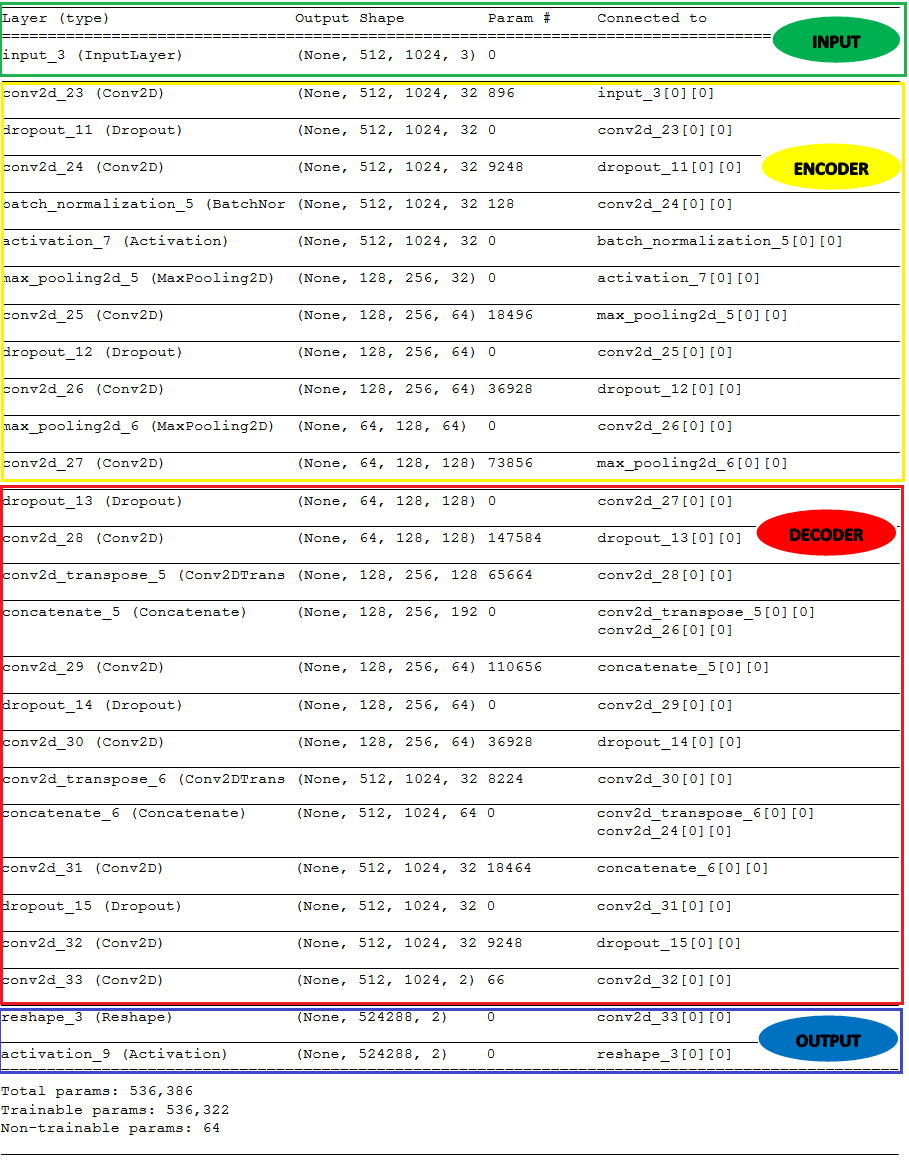

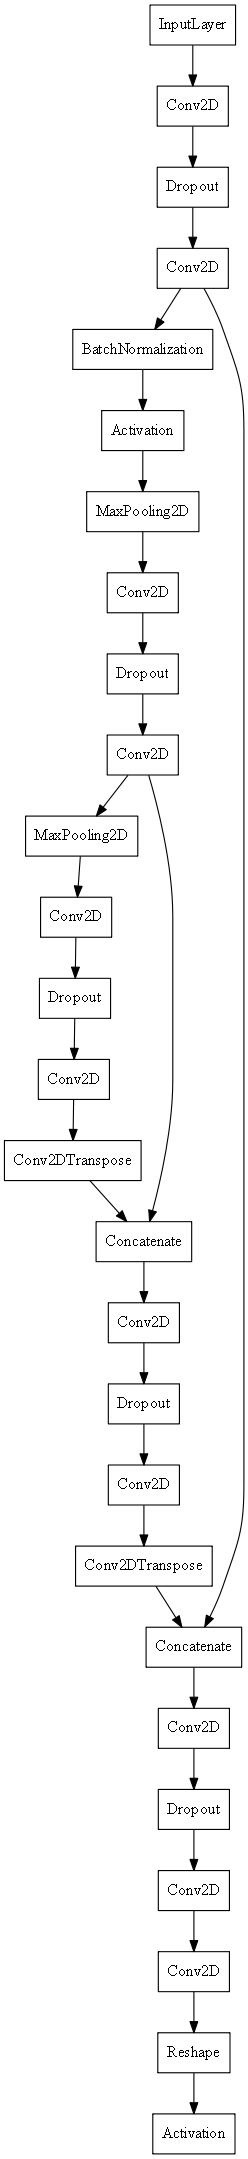

#### Wyniki

- `loss: 0.0128`
- `mean_iou: 0.8921`
- `val_loss: 0.0129`
- `val_mean_iou: 0.8925`

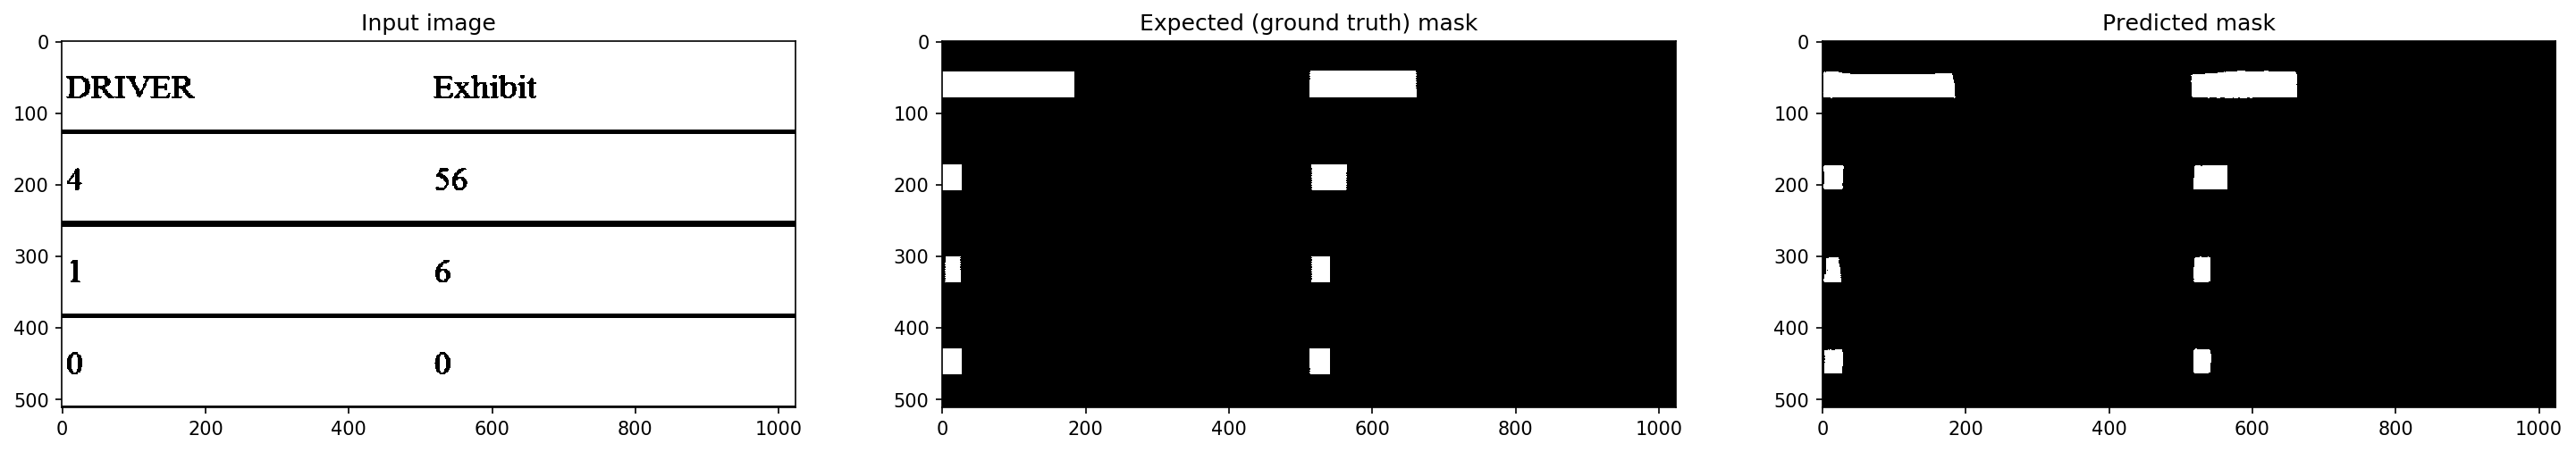



------------------------------------------------------





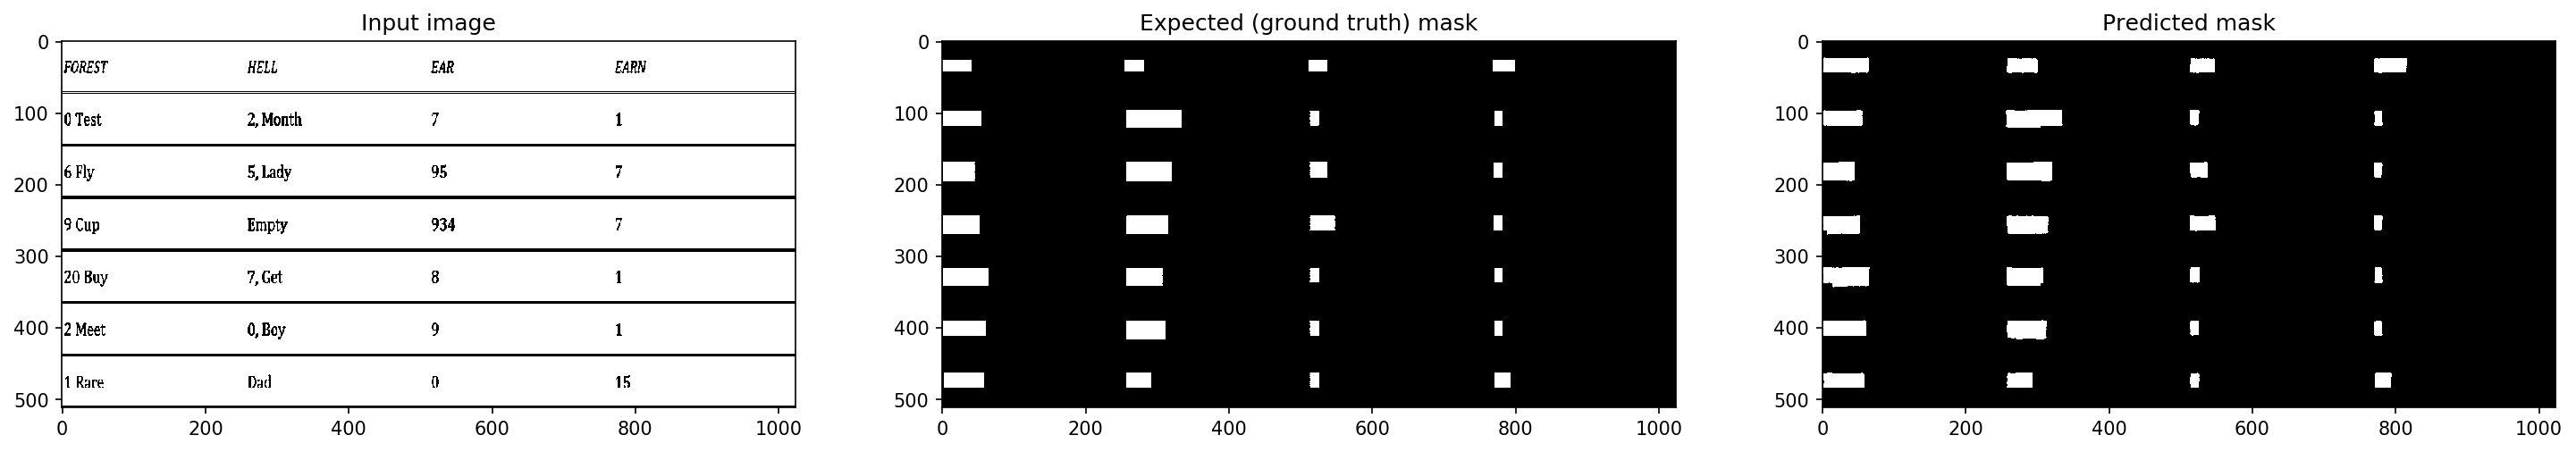



------------------------------------------------------





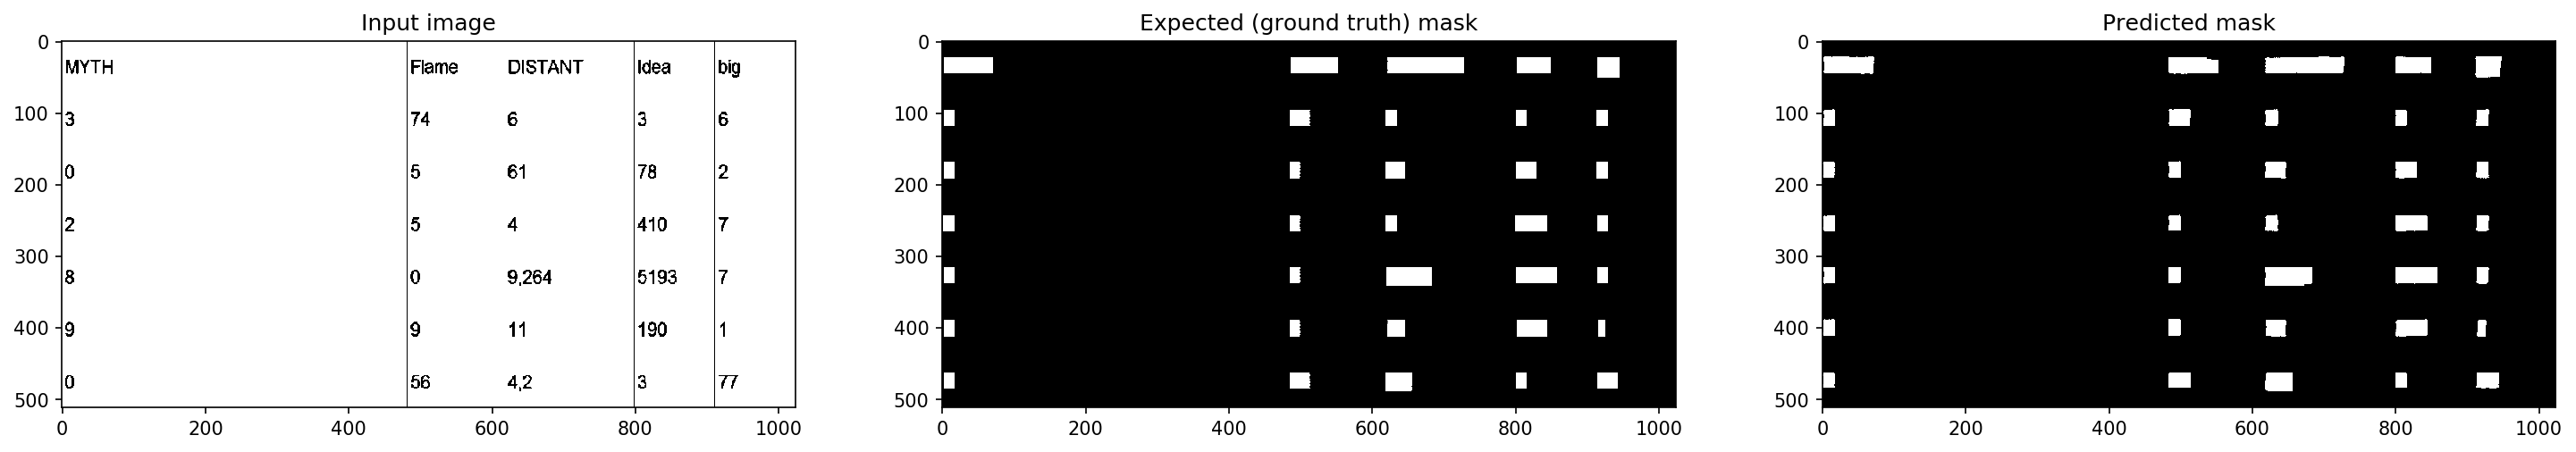



------------------------------------------------------





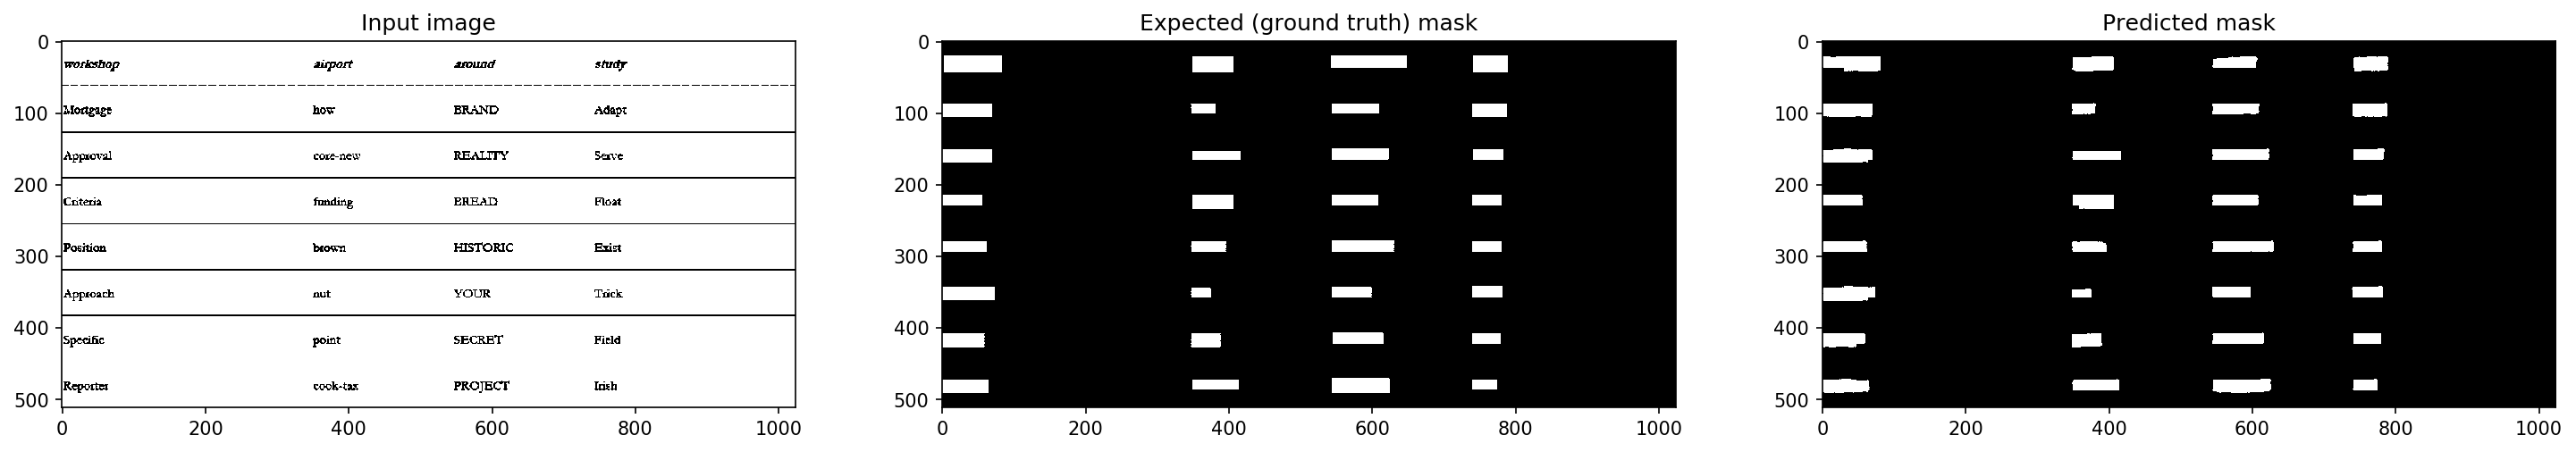



------------------------------------------------------





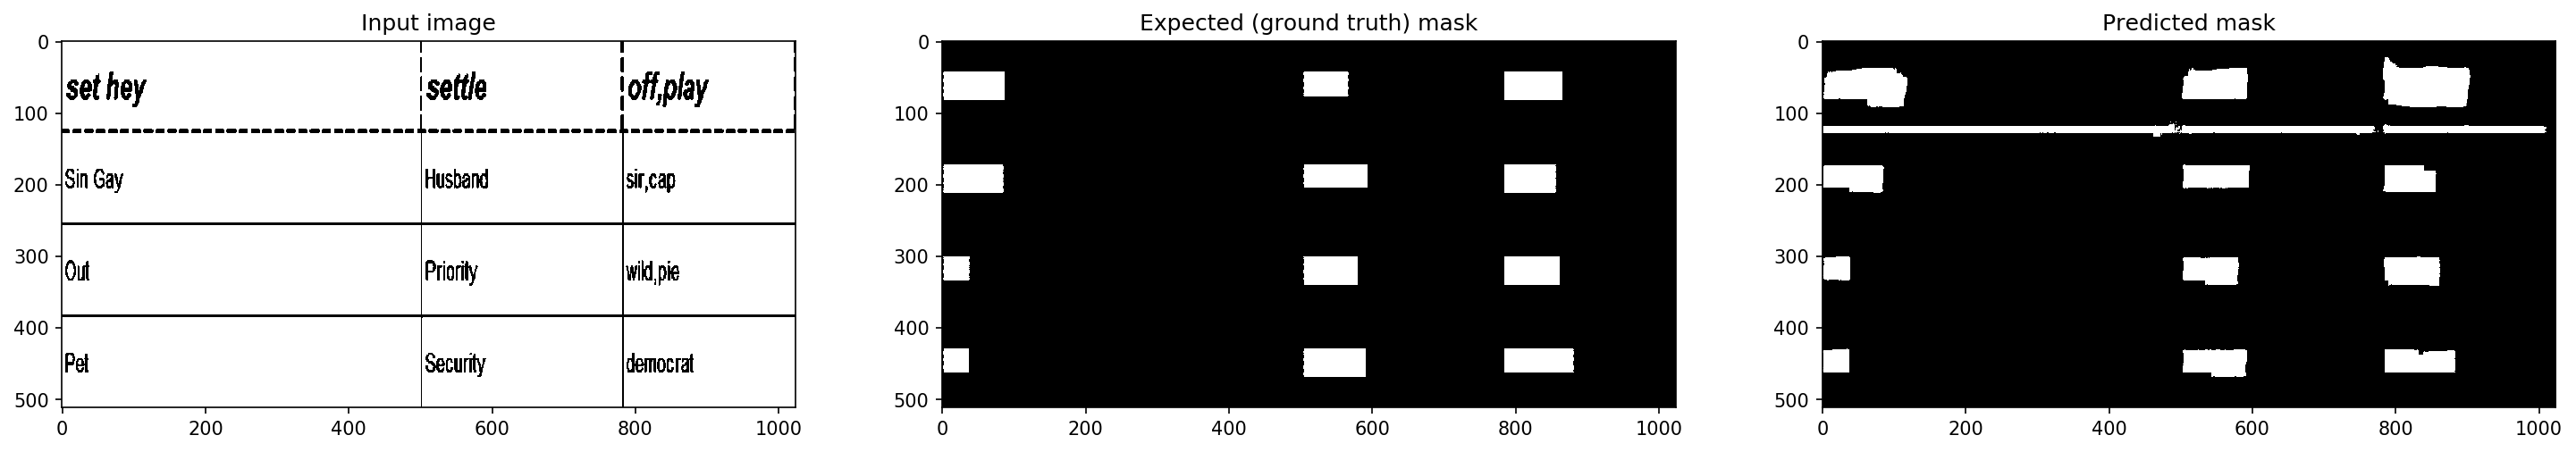



------------------------------------------------------





In [4]:
show_prediction("model_table_cells_binary.h5", model_type="cells")

**b) Podział na kolumny**

**Rozwiązanie/implementacja**

Jak w punkcie a)

#### Wyniki

- loss: 0.1312
- mean_iou: 0.7961
- val_loss: 0.1323
- val_mean_iou: 0.7962

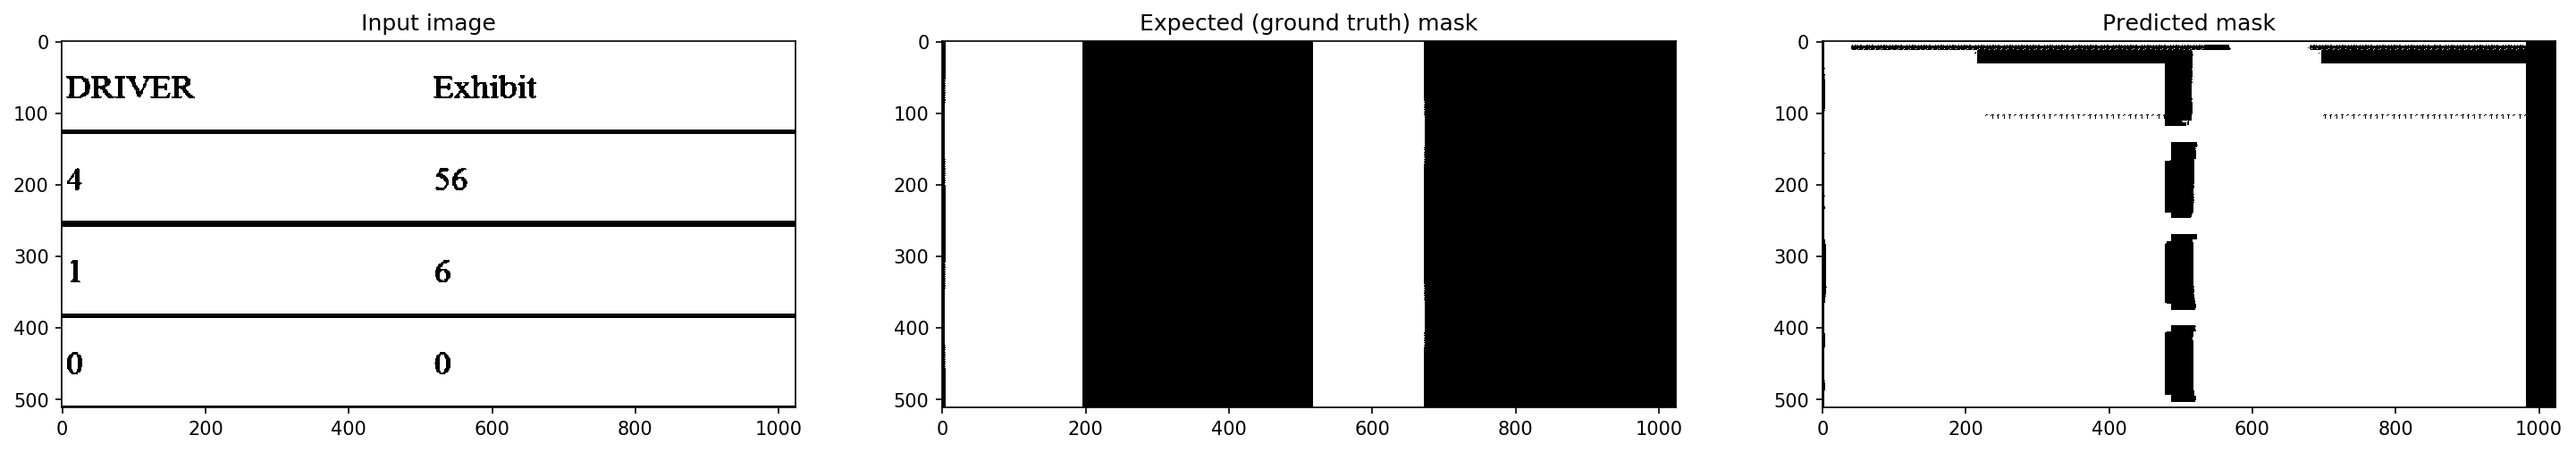



------------------------------------------------------





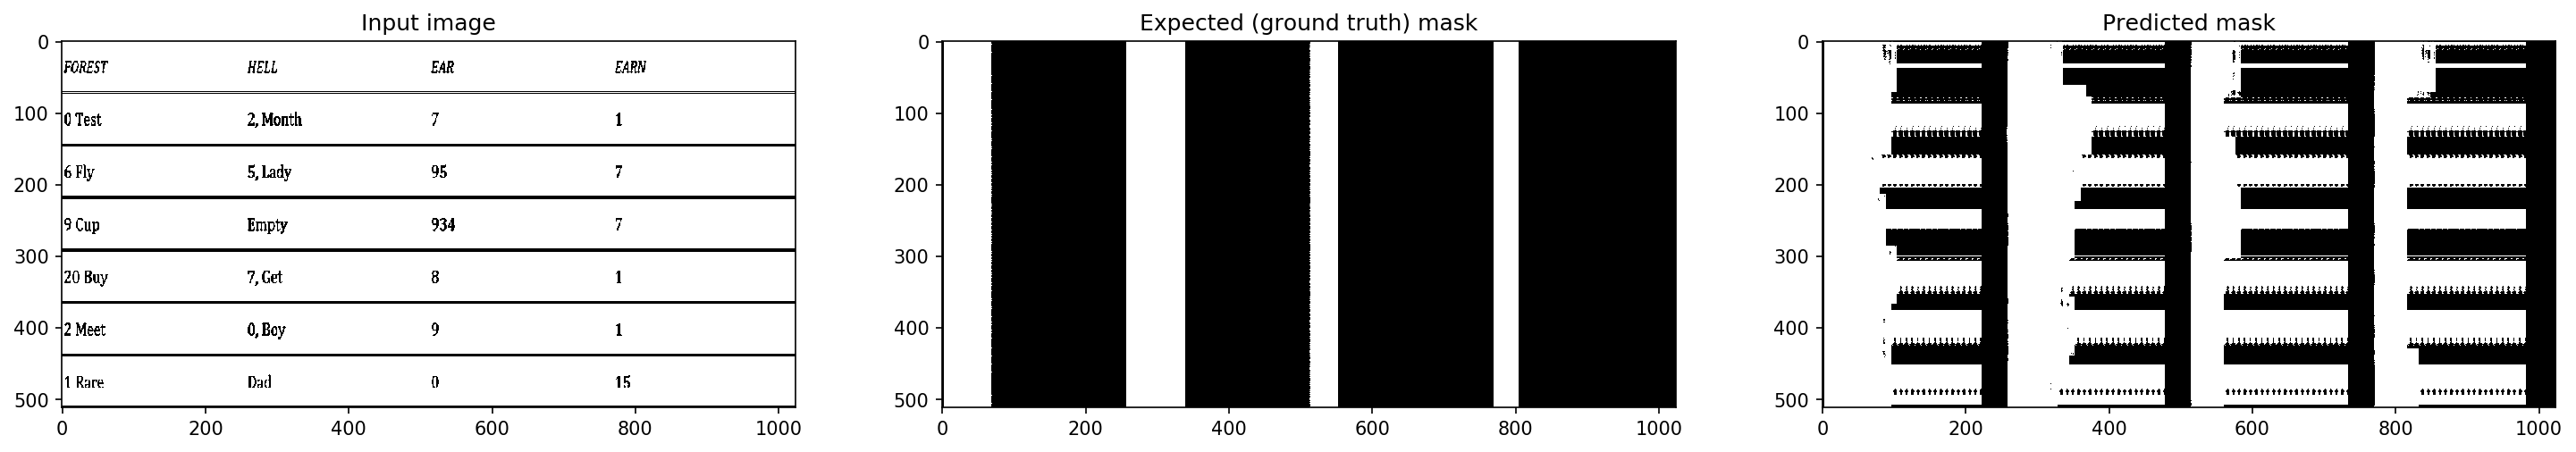



------------------------------------------------------





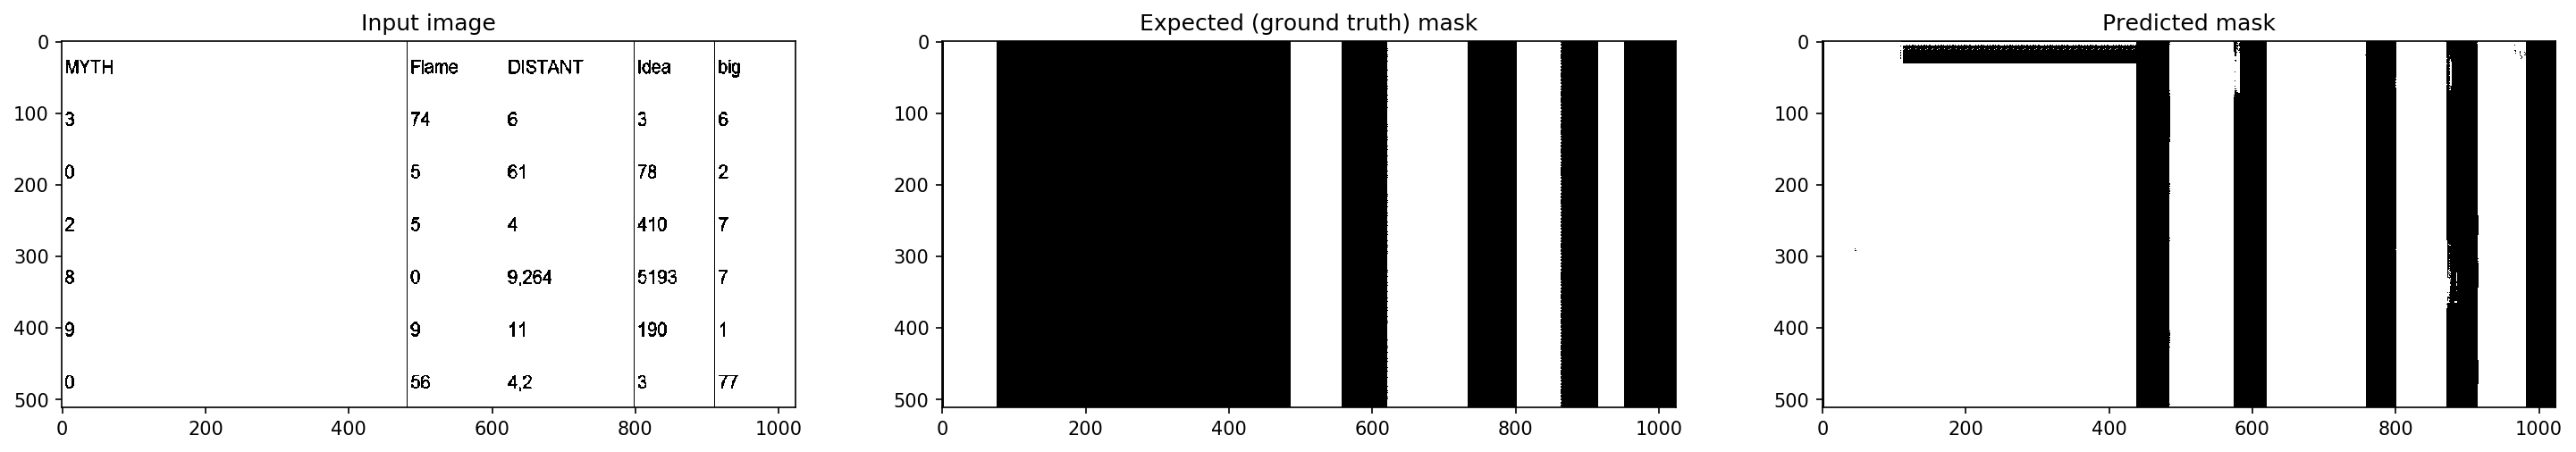



------------------------------------------------------





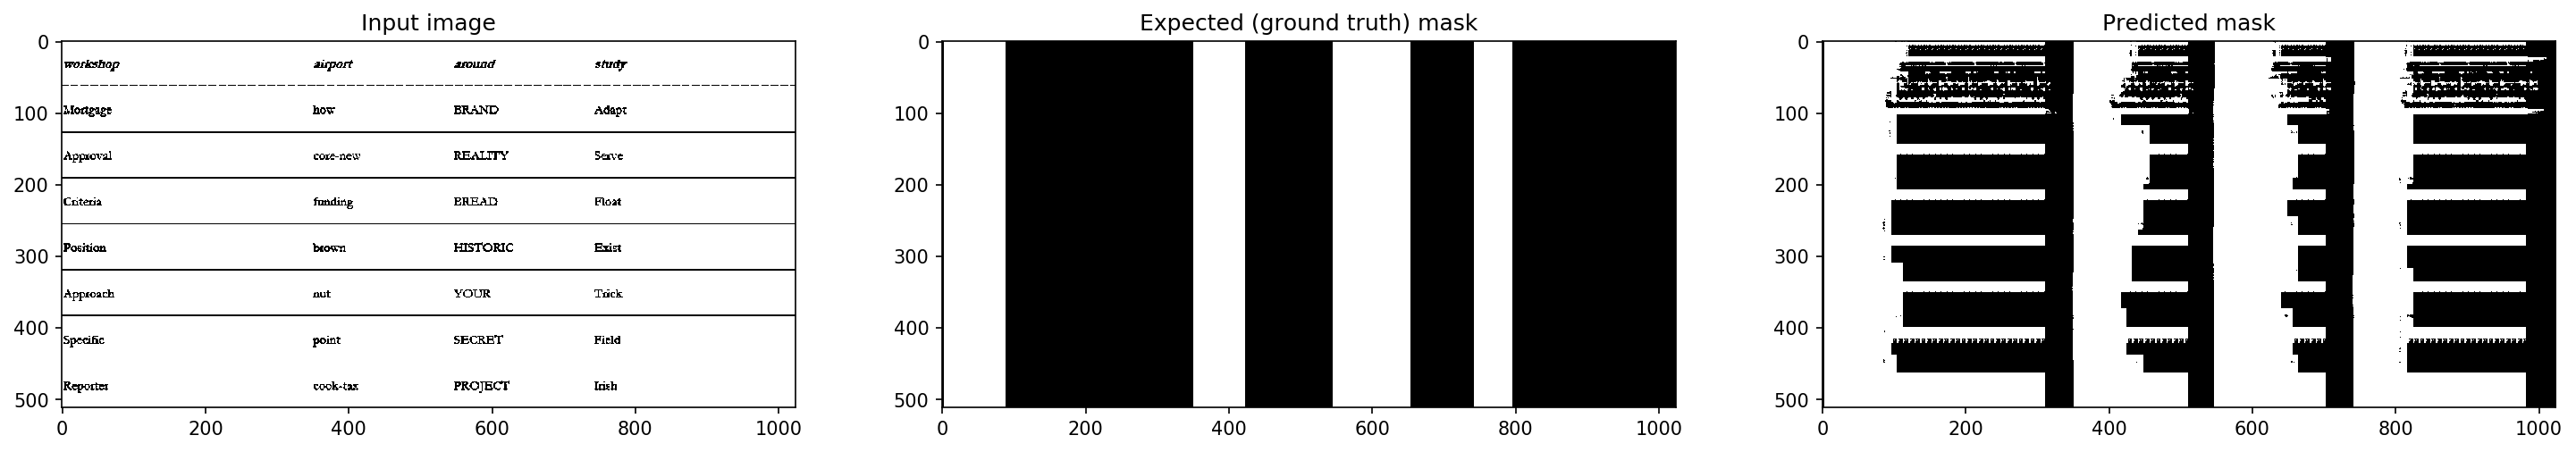



------------------------------------------------------





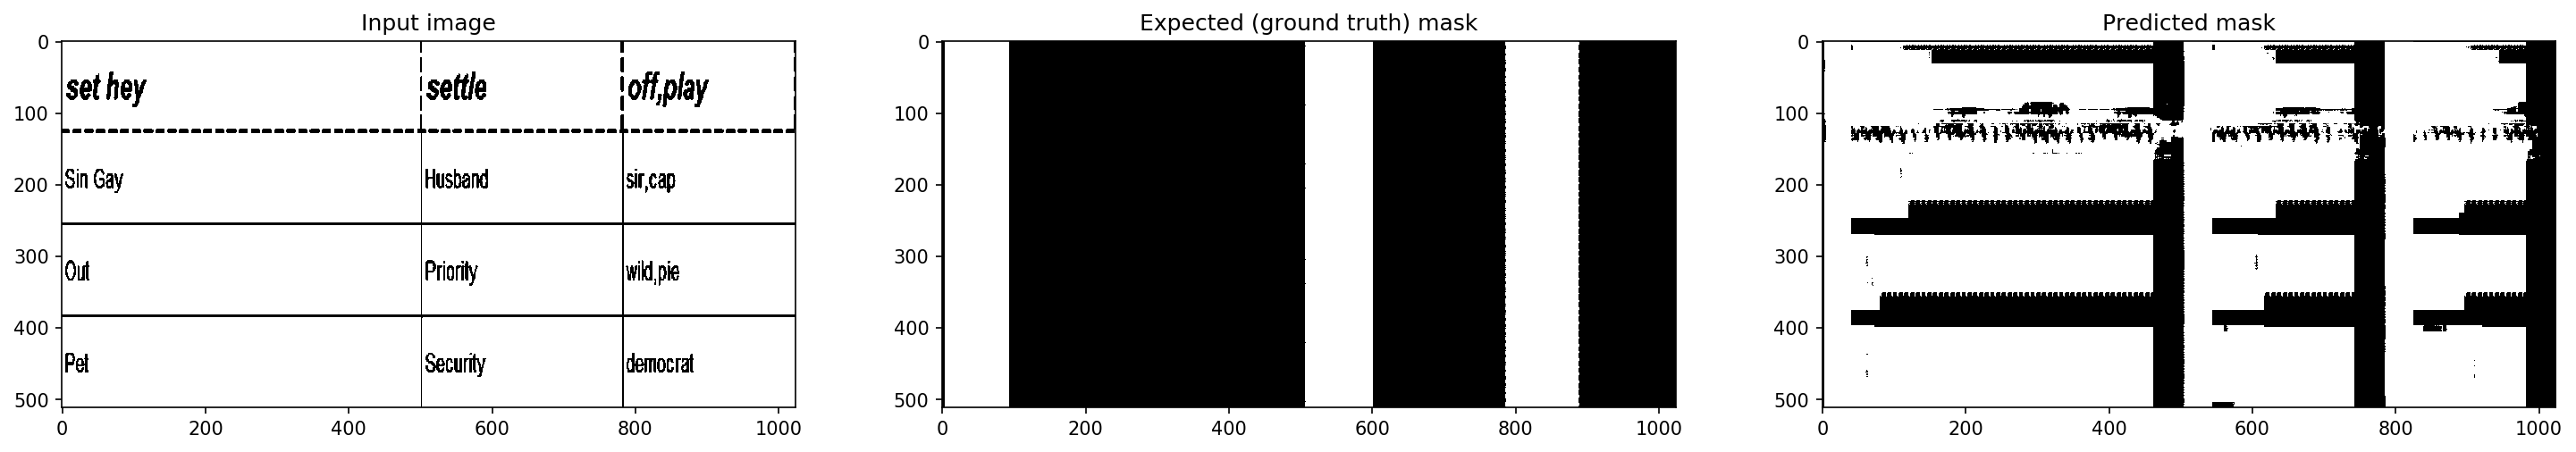



------------------------------------------------------





In [5]:
show_prediction("model_table_columns_binary.h5", model_type="columns")

### Etap 2:

#### Definicja problemu:

Celem etapu drugiego jest tzw. optyczne rozpoznawanie znaków (ang. OCR - optical character recognition), czyli ekstrakcja tekstu z obrazu. W tym przypadku obraz będzie zawierał tekst danego elementu tabelki (np. komórki), wyekstrahowanym przez pierwszy model.


#### Rozwiązanie/implementacja

TBD

### Etap 3:

TBD

## Podsumowanie

